# GAM 101

![title](https://miro.medium.com/max/1268/1*WHGfdA67N800v2Fhaw3_Xg.png)

    g(E(Y)) is the link function that links the expected value to the predictor variables x1,x2,…,xm. It tells how the expected value of the response relates to the predictor variables. GAM support multiple link functions.
    
    
    f1(x1) + f2(x2) + … +fm(xm) is the functional form with an additive structure which consists of a number of terms f1(x1) , f2(x2) , … ,fm(xm). The terms denote smooth, non-parametric functions.
    
    
    Distribution refers to the distribution of the response variable Y. It could be any distribution from the exponential family, such as Gaussian, binomial Poisson and etc.

GAM allows us to easily examine the partial relationships between the response variable and the predictors. 

its addictive nature ensures that the marginal impact of a single variable does not depend on the others in the model. 

its ability to control the smoothness of the predators can help us obtain a more clear relationship. 

# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import statistic
%reload_ext autoreload

# Regression

## Load data

In [9]:
# import the csv file directly from an s3 bucket
data = pd.read_csv(r'E:\gitlab\dataset\winequality-white.csv',sep=';')

In [10]:
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

In [11]:
data_X = data.drop(['quality'], axis=1).values
data_y = data['quality']

## Build the model via gridsearch for regression

100% (100 of 100) |######################| Elapsed Time: 0:00:24 Time:  0:00:24


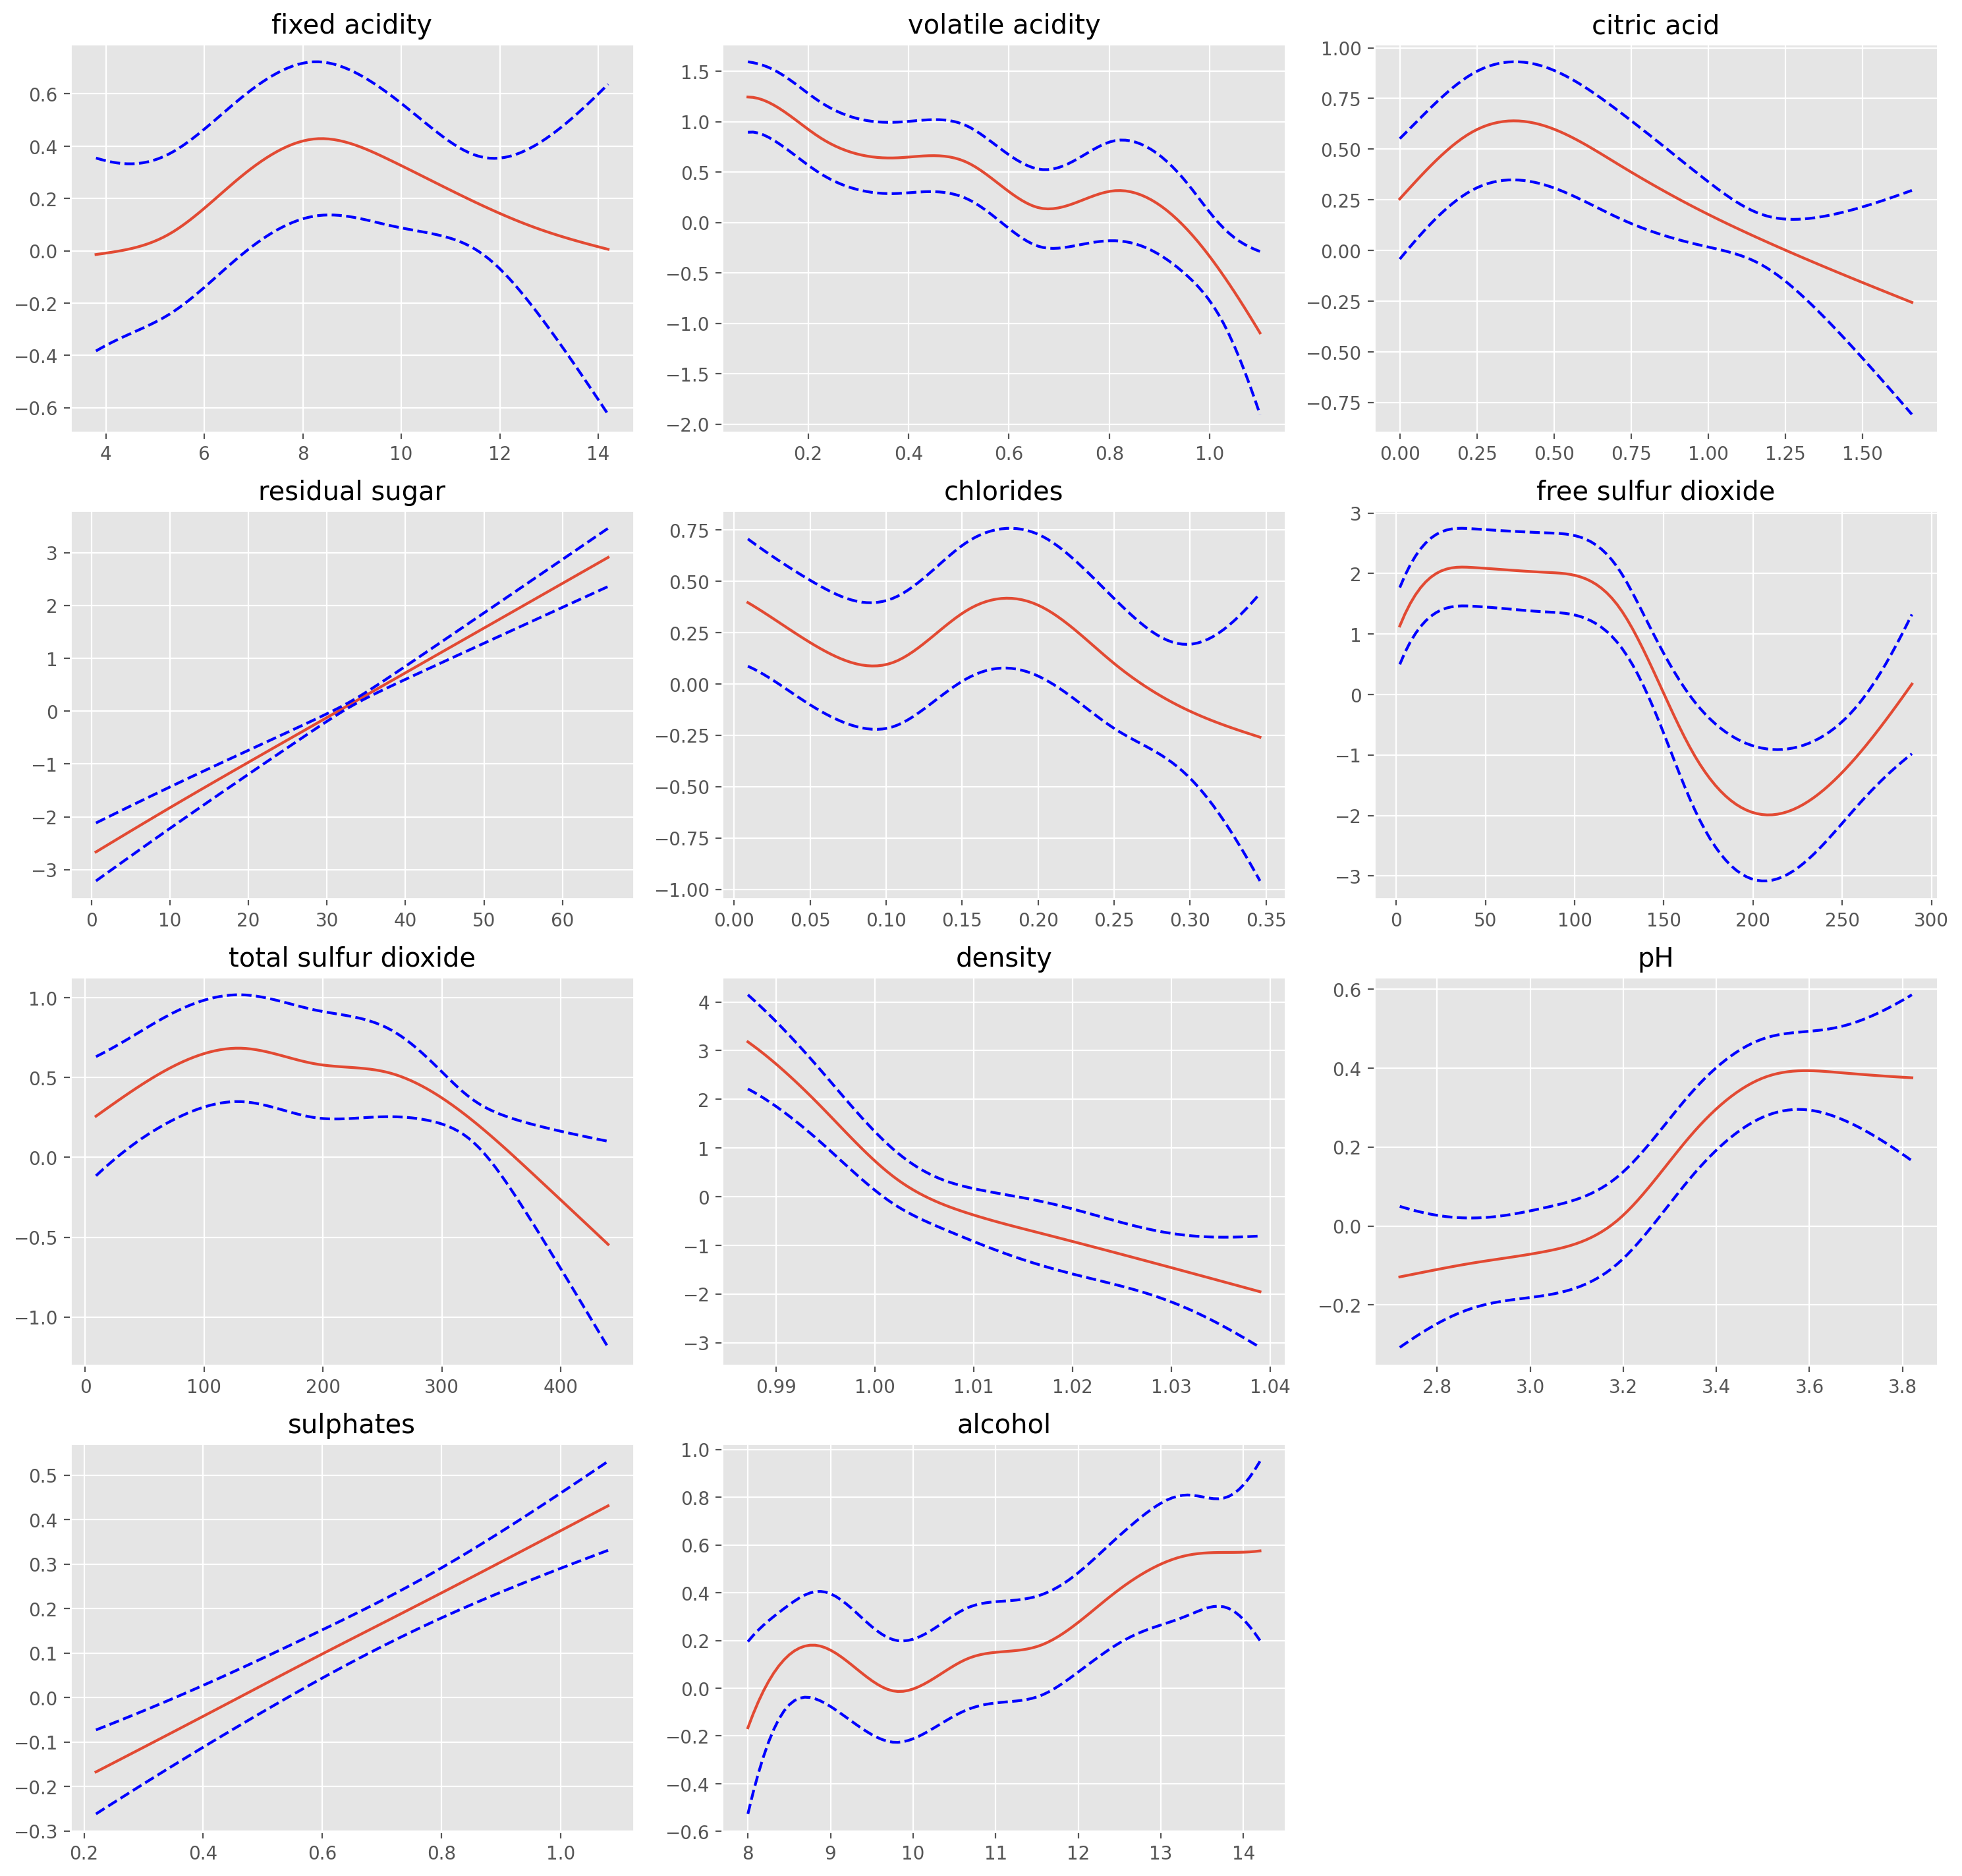

In [42]:
gam_model = statistic.gam(data,target='quality',
                          types='linear',n_gridsearch=100)

# Classification

## Load data

In [11]:
# import the csv file directly from an s3 bucket
data = pd.read_csv(r'E:\gitlab\dataset\tumors.csv')

In [12]:
# drop the id column
data = data.drop(['id'],axis=1)

# encode the diagnosis column
data.loc[data['diagnosis']=='M','diagnosis'] =1
data.loc[data['diagnosis']=='B','diagnosis'] =0

In [13]:
data

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           1        17.99         10.38          122.80     1001.0   
1           1        20.57         17.77          132.90     1326.0   
2           1        19.69         21.25          130.00     1203.0   
3           1        11.42         20.38           77.58      386.1   
4           1        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         1        21.56         22.39          142.00     1479.0   
565         1        20.13         28.25          131.20     1261.0   
566         1        16.60         28.08          108.30      858.1   
567         1        20.60         29.33          140.10     1265.0   
568         0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

## Build the model via gridsearch for classification

 18% (2 of 11) |####                     | Elapsed Time: 0:00:19 ETA:   0:01:43

did not converge


 27% (3 of 11) |######                   | Elapsed Time: 0:00:33 ETA:   0:01:54

did not converge


 45% (5 of 11) |###########              | Elapsed Time: 0:00:50 ETA:   0:01:23

did not converge


 54% (6 of 11) |#############            | Elapsed Time: 0:01:06 ETA:   0:01:19

did not converge


 63% (7 of 11) |###############          | Elapsed Time: 0:01:21 ETA:   0:00:58

did not converge


 72% (8 of 11) |##################       | Elapsed Time: 0:01:35 ETA:   0:00:42

did not converge


 81% (9 of 11) |####################     | Elapsed Time: 0:01:49 ETA:   0:00:28

did not converge


 90% (10 of 11) |#####################   | Elapsed Time: 0:02:03 ETA:   0:00:14

did not converge


100% (11 of 11) |########################| Elapsed Time: 0:02:17 Time:  0:02:17


did not converge


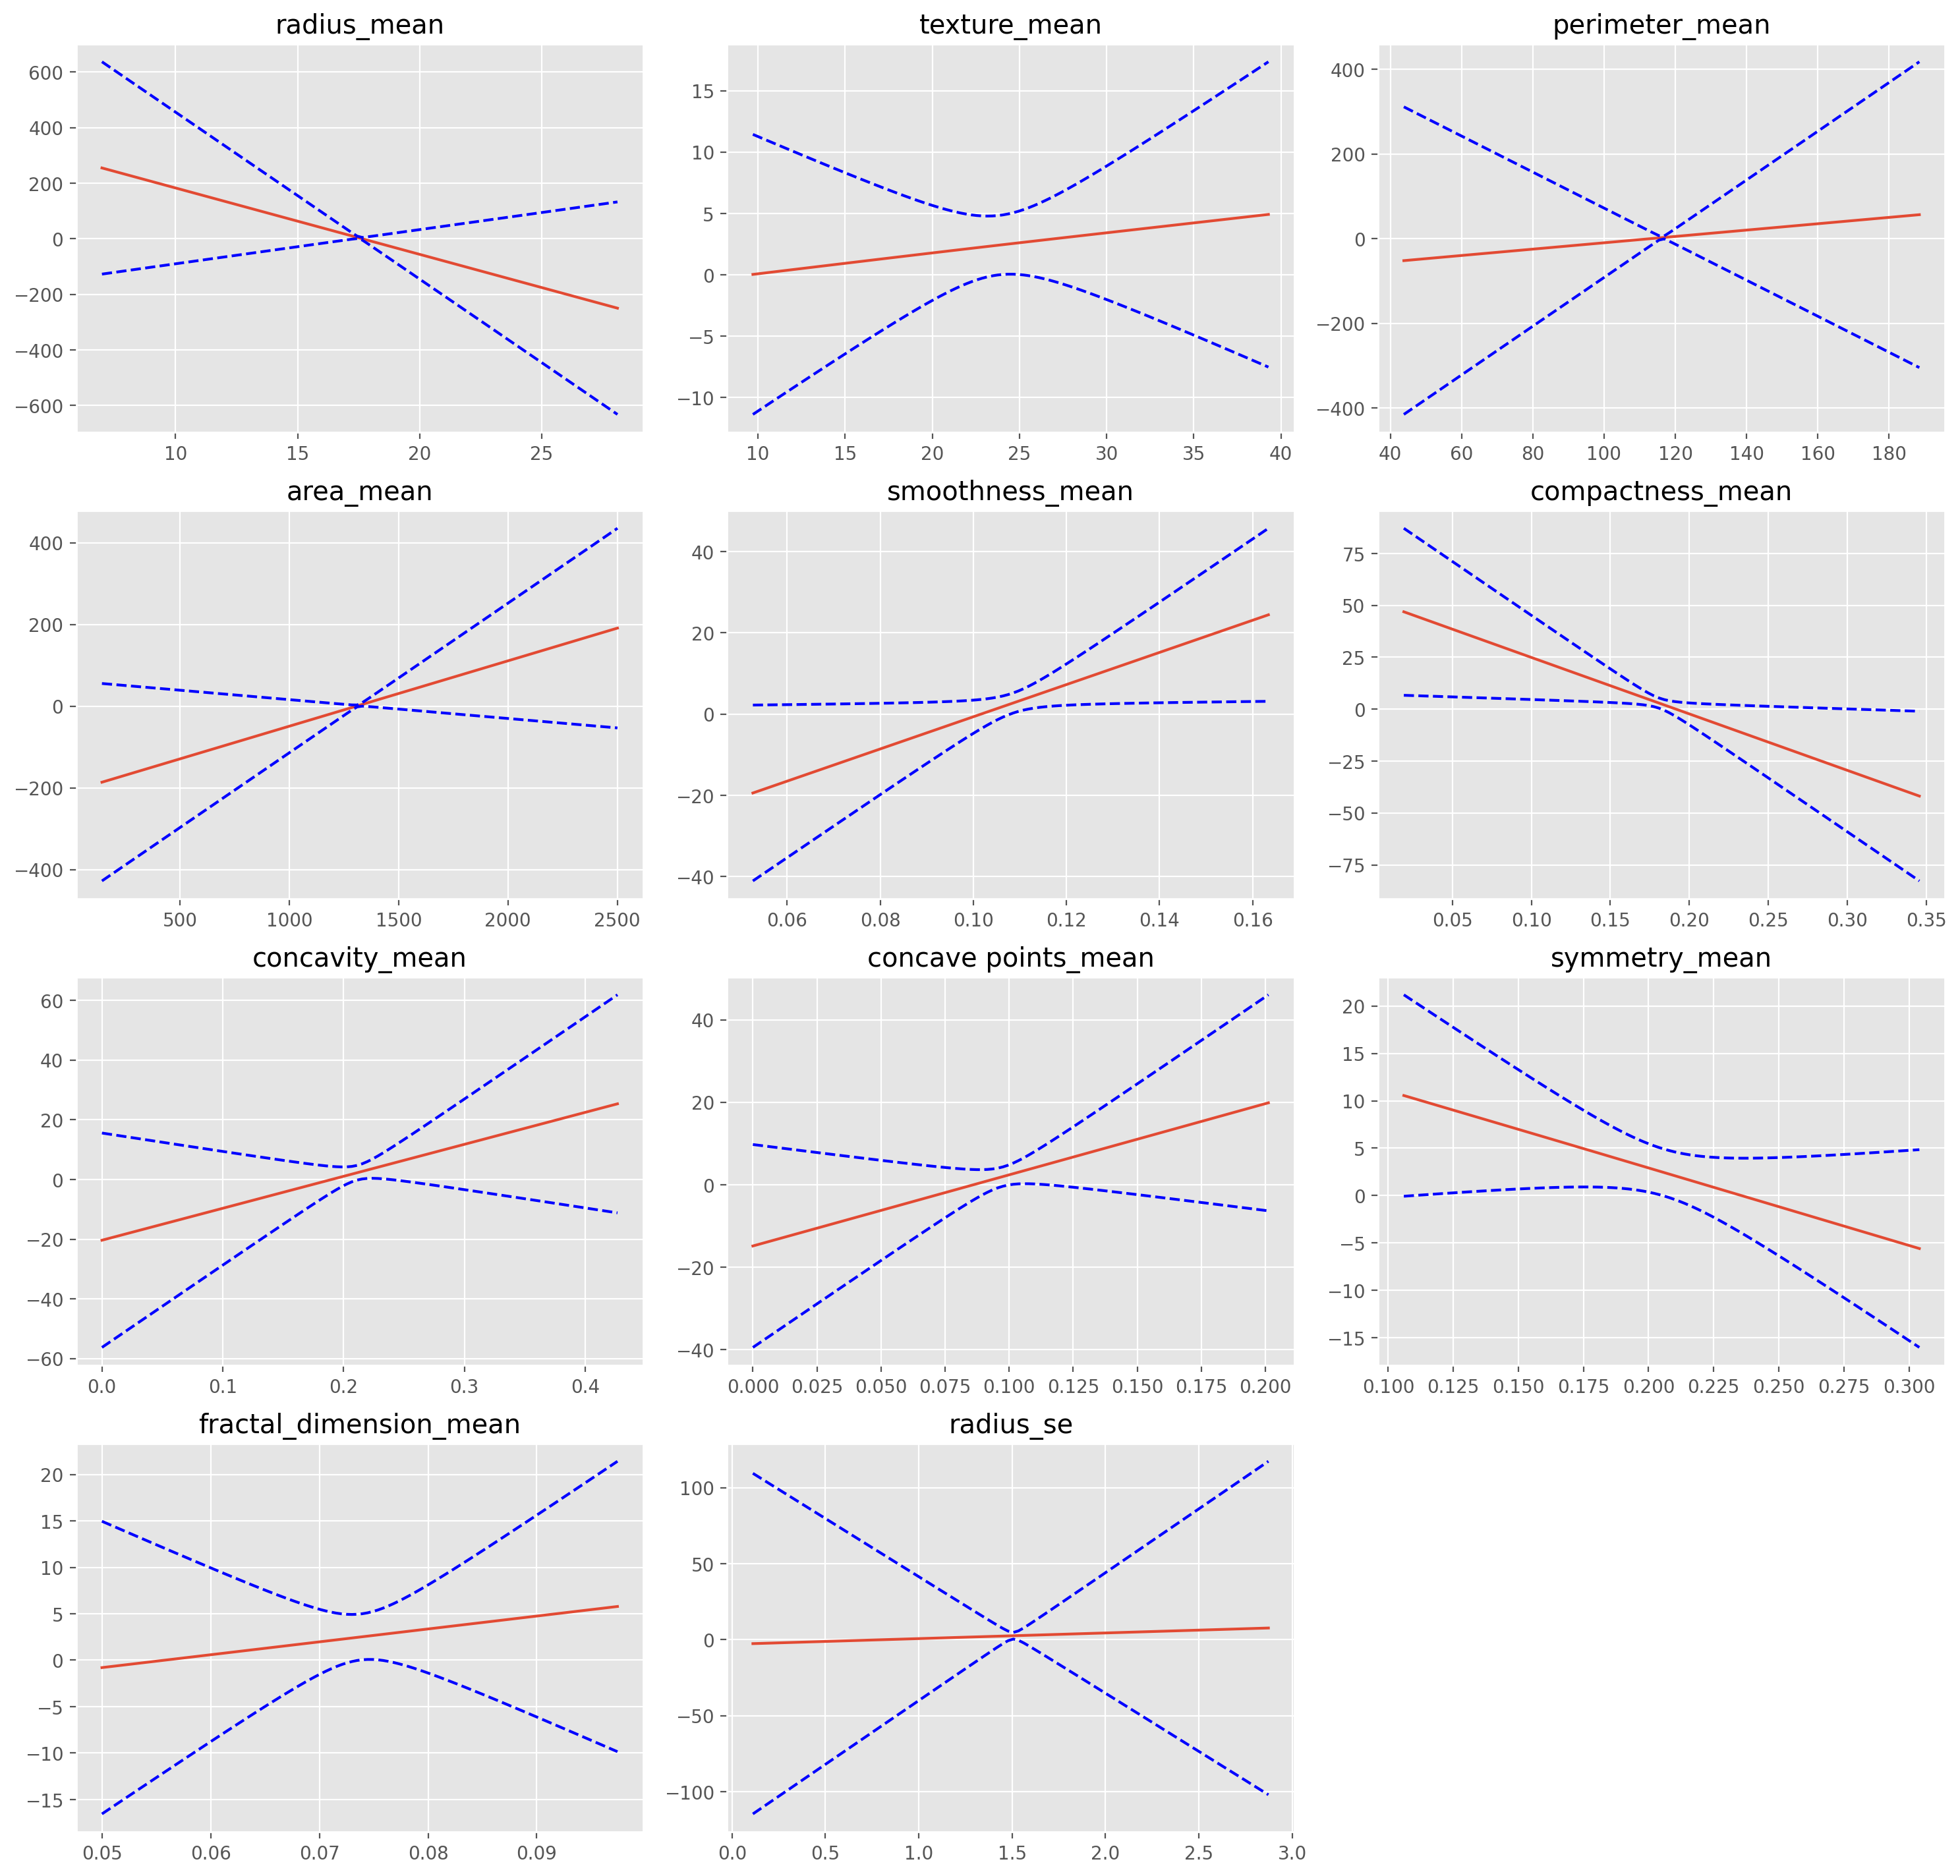

In [15]:
gam_model = statistic.gam(data,target='diagnosis',
                          types='classification',n_splines=10,n_gridsearch=100)

In [16]:
gam_model.accuracy(data.drop(['diagnosis'], axis=1).values, data['diagnosis'])

0.9964850615114236